<a href="https://colab.research.google.com/github/liz-soo/chatbot/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-최근접이웃
도미문제

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
import numpy as np
fish_data=np.column_stack((fish_length,fish_weight))
fish_target=np.concatenate((np.ones(35),np.zeros(14)))

In [ ]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target=train_test_split(fish_data,fish_target, stratify=fish_target,random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(train_input,train_target)
kn.score(test_input, test_target)

1.0

In [ ]:
kn.predict([[30,600]])

array([1.])

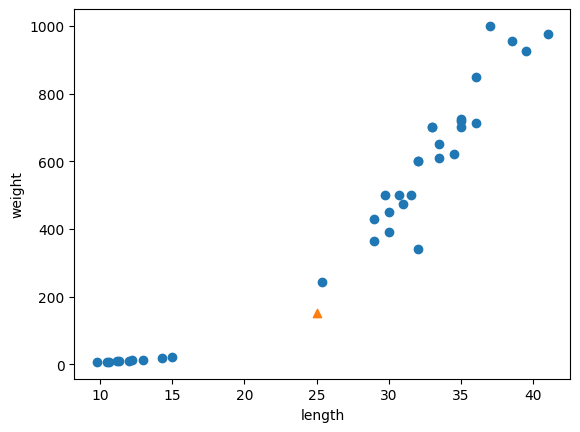

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# k-최근접 이웃 회귀


In [1]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

<function matplotlib.pyplot.show(close=None, block=None)>

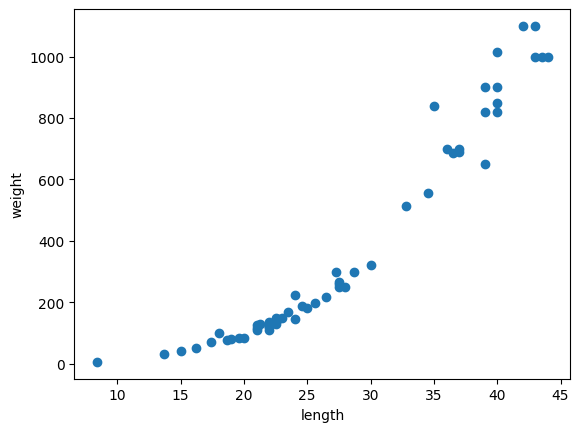

In [2]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show

In [9]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target=train_test_split(perch_length, perch_weight)
train_input=train_input.reshape(-1,1)
test_input=test_input.reshape(-1,1)

In [10]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(train_input, train_target)
knr.score(test_input, test_target)

0.9706867964230871

In [11]:
from sklearn.metrics import mean_absolute_error
test_prediction=knr.predict(test_input)
mae=mean_absolute_error(test_target, test_prediction)
print(mae) # 예측이 평균적으로 mae값만큼 타깃값(정답)과 다르다.

37.49285714285714


## 연습문제: 아이스크림 회귀 (온도에 따른 아이스크림 매출)

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df=pd.read_csv('https://raw.githubusercontent.com/liz-soo/machine_learning/refs/heads/main/IceCreamData.csv')
Temperature=df['Temperature'].values
Revenue=df['Revenue'].values

train_input, test_input, train_target, test_target=train_test_split(Temperature, Revenue)
train_input=train_input.reshape(-1,1)
test_input=test_input.reshape(-1,1)

In [61]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(train_input, train_target)
print(knr.score(test_input, test_target))
print(knr.score(train_input,train_target)) # 이게 test값보다 작으면 과소적합, 너무 크면 과대적합

0.9695112705554374
0.9838626259204808


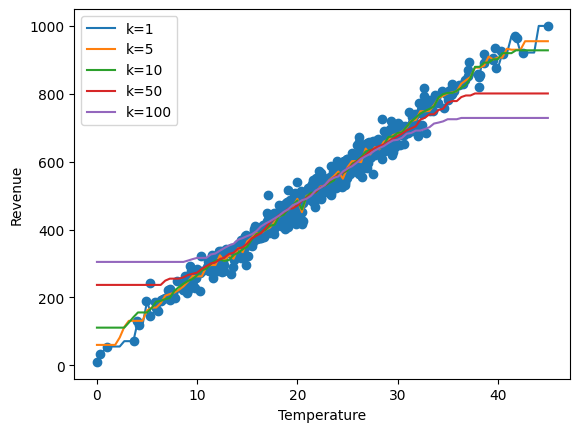

In [62]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
x=np.linspace(min(Temperature), max(Temperature),100)

plt.scatter(Temperature, Revenue)
for n in [1,5,10,50,100]:
    knr.n_neighbors=n
    knr.fit(train_input, train_target)
    y=knr.predict(x.reshape(-1,1))
    plt.plot(x, y, label=f"k={n}")
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.legend()
plt.show()

# 선형회귀

In [42]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [43]:
from sklearn.model_selection import train_test_split

train_input,test_input,train_target,test_target=train_test_split(perch_length, perch_weight, random_state=42)
train_input=train_input.reshape(-1,1)
test_input=test_input.reshape(-1,1)

0.939846333997604
0.8247503123313558


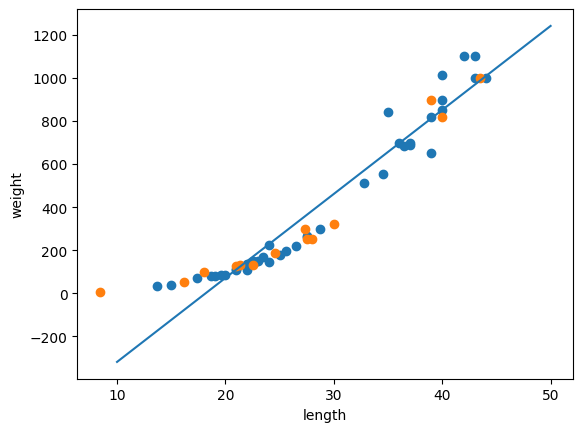

In [49]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))
plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)
plt.plot([10,50],[10*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

훈련세트:0.9706807451768623
테스트세트:0.9775935108325122


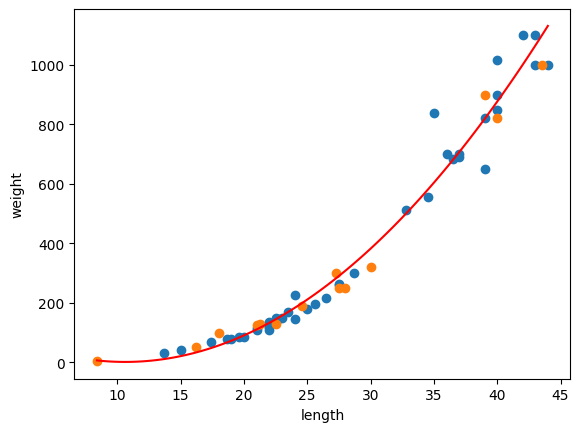

In [57]:
train_poly=np.column_stack((train_input**2,train_input)) # 이차함수라고 해서 비선형회귀(non-linear)가 아니다! non-linear은 지수에 beta값이 들어가는등 매우 이상한식이여야 비선형...
test_poly=np.column_stack((test_input**2,test_input))
lr=LinearRegression()
lr.fit(train_poly, train_target)
print(f'훈련세트:{lr.score(train_poly, train_target)}')
print(f'테스트세트:{lr.score(test_poly, test_target)}')

plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)
x=np.linspace(min(perch_length),max(perch_length),100)
y=lr.coef_[0]*x**2+lr.coef_[1]*x+lr.intercept_
plt.plot(x,y,color='red')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 다중회귀(multiple regression)

In [ ]:
import pandas as pd
df=pd.read_csv